In [59]:
import os, glob
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs

In [66]:
table = []
inters = ['three','Four','Five']
for inter in inters:
    files = glob.glob(f'./1_hour/*_{inter}*.xml')
    df = pd.DataFrame(columns=['PCUs/hour','Average_Time_Delay','Travel_Time'])
    for i in files:
        travel_time = {}
        ATT = []
        ADT = []
        delay = {}
        df1 = {'PCUs/hour': float(i.split('/')[-1].split('_')[0])}
        with open(i, "r") as file:
            content = file.read() # Read each line in the file, readlines() returns a list of lines
            
            content = "".join(content) # Combine the lines in the list into a string

            bs_content = bs(content, "lxml")

        tripinfo = list(bs_content.find_all("tripinfo"))

        for trip in tripinfo:
            try:
                ADT.append(float(trip["waitingtime"]))
                delay[trip["id"].split(".")[1].split("_")[0]].append(float(trip["waitingtime"]))
            except KeyError:
                delay[trip["id"].split(".")[1].split("_")[0]] = []
                delay[trip["id"].split(".")[1].split("_")[0]].append(float(trip["waitingtime"]))
            try:
                ATT.append(float(trip["duration"]))
                travel_time[trip["id"].split(".")[1].split("_")[0]].append(float(trip["duration"]))
            except KeyError:
                travel_time[trip["id"].split(".")[1].split("_")[0]] = []
                travel_time[trip["id"].split(".")[1].split("_")[0]].append(float(trip["duration"]))
        

        for j in delay.keys():
            delay[j] = np.mean(delay[j])
            travel_time[j] = np.mean(travel_time[j])
        df1['Average_Time_Delay'] = np.mean(ADT)
        df1['Travel_Time'] = np.mean(ATT)

        df=df.append(df1,ignore_index=True)
    df=df.sort_values(by=['PCUs/hour'])
    table.append(df)
table = dict(zip(inters,table))
table

/home/arms04/.local/lib/python3.8/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


{'three':    PCUs/hour  Average_Time_Delay  Travel_Time
 3      150.0            0.311333    64.788833
 4      200.0            0.453633    65.190705
 1      250.0            0.535899    65.584101
 0      300.0            0.952360    67.298360
 2      350.0            1.044742    67.872736,
 'Four':    PCUs/hour  Average_Time_Delay  Travel_Time
 2      150.0            0.708418    65.942660
 3      200.0            1.367568    68.062875
 4      250.0            1.551322    68.828955
 1      300.0            2.257996    71.383619
 0      350.0            3.957811    80.350544,
 'Five':    PCUs/hour  Average_Time_Delay  Travel_Time
 0      150.0            0.982048    66.530433
 2      200.0            1.826147    69.281906
 4      250.0            3.928525    76.335186
 3      300.0           10.246836    98.250669
 1      350.0           25.507733   153.678403}

In [67]:
labels = ['Three-way','Four-way','Five-way']
# labels = ['Li and Liu','Four-way','ATS','FTS']
table

{'three':    PCUs/hour  Average_Time_Delay  Travel_Time
 3      150.0            0.311333    64.788833
 4      200.0            0.453633    65.190705
 1      250.0            0.535899    65.584101
 0      300.0            0.952360    67.298360
 2      350.0            1.044742    67.872736,
 'Four':    PCUs/hour  Average_Time_Delay  Travel_Time
 2      150.0            0.708418    65.942660
 3      200.0            1.367568    68.062875
 4      250.0            1.551322    68.828955
 1      300.0            2.257996    71.383619
 0      350.0            3.957811    80.350544,
 'Five':    PCUs/hour  Average_Time_Delay  Travel_Time
 0      150.0            0.982048    66.530433
 2      200.0            1.826147    69.281906
 4      250.0            3.928525    76.335186
 3      300.0           10.246836    98.250669
 1      350.0           25.507733   153.678403}

### Plotting Average time delay bar graph

[-0.12  0.    0.12]
3


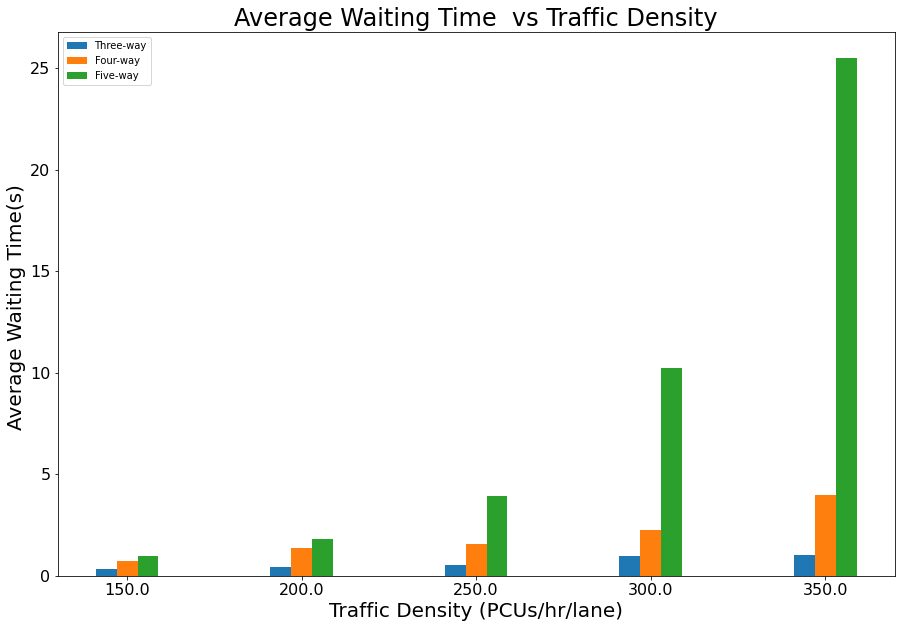

In [68]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# X = list(table[0]['PCUs/hour'])
fig,ax = plt.subplots()
fig.set_size_inches(15,10)
mosad = np.linspace(-0.12,0.12,3)
print(mosad)
count = 0
for i, j in table.items():
    X_axis = np.arange(len(list(j['PCUs/hour'])))
    ax.bar(X_axis + mosad[count], list(j['Average_Time_Delay']), 0.12, label = f'{labels[count]}')
    count += 1
    # plt.bar(X_axis + 0.2, list(j['Travel_Time']), 0.4, label = f'{i}')
print(count)
X = list(table['Four']['PCUs/hour'])
ax.set_xticks(X_axis, X)
# ax.set_yticks(ax.get_yticks(),fontsize=16)
ax.tick_params(labelsize = 16)
ax.set_xlabel("Traffic Density (PCUs/hr/lane)",fontsize=20)
ax.set_ylabel("Average Waiting Time(s) ",fontsize=20)
ax.set_title("Average Waiting Time  vs Traffic Density",fontsize=24)
ax.legend()
plt.show()
fig.savefig("average_delay.png", dpi = 100,bbox_inches='tight', pad_inches=0.1,facecolor='w')

### Plotting Average Travel Time Bar graph

[-0.12  0.    0.12]
3


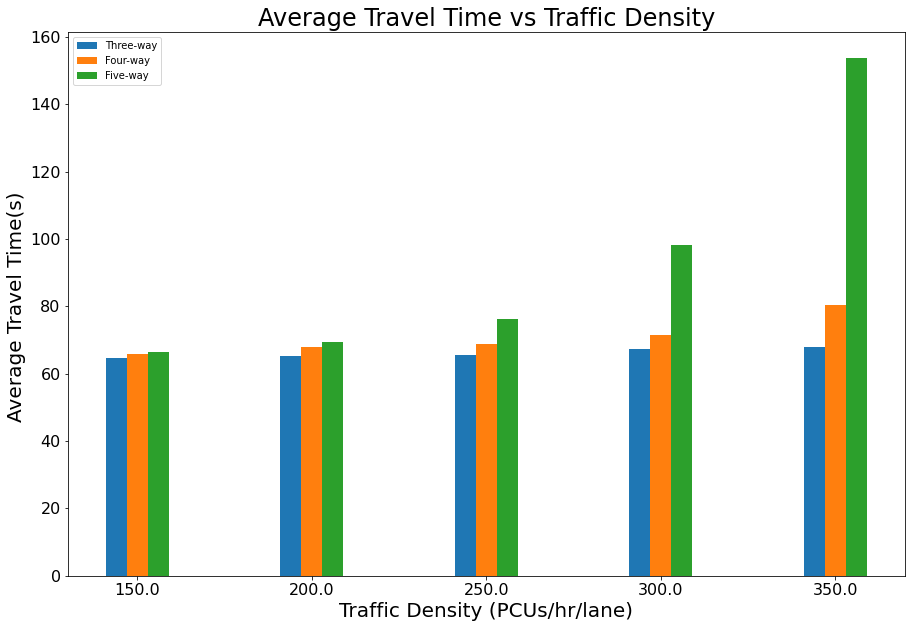

In [69]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# X = list(table[0]['PCUs/hour'])
fig,ax = plt.subplots()
fig.set_size_inches(15,10)
mosad = np.linspace(-0.12,0.12,3)
print(mosad)
count = 0
for i, j in table.items():
    X_axis = np.arange(len(list(j['PCUs/hour'])))
    ax.bar(X_axis + mosad[count], list(j['Travel_Time']), 0.12, label = f'{labels[count]}')
    count += 1
    # plt.bar(X_axis + 0.2, list(j['Travel_Time']), 0.4, label = f'{i}')
print(count)
X = list(table['Four']['PCUs/hour'])
ax.set_xticks(X_axis, X)
ax.tick_params(labelsize = 16)
ax.set_xlabel("Traffic Density (PCUs/hr/lane)",fontsize=20)
ax.set_ylabel("Average Travel Time(s) ",fontsize=20)
ax.set_title("Average Travel Time vs Traffic Density",fontsize=24)
ax.legend()
plt.show()
fig.savefig("average_travel_time.png", dpi = 100,bbox_inches='tight', pad_inches=0.1,facecolor='w')

(1088, 1456, 1)
(1088, 1456, 2)
(1088, 1456, 3)
(1088, 1456, 4)
(1088, 1456, 5)


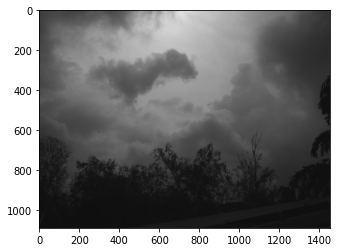

[2, 3, 4, 5, 6]
